# Kinect + RGB Object Recognition (alpha)

## Preprocessing

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import warnings; warnings.simplefilter('ignore')

### Setting Working Directory

In [2]:
DATADIR = "/home/fw2ty/Documents/Studio/fruits/fruits-360_dataset/fruits-360/"

TRAINDIR = os.path.join(DATADIR, 'Training')
TESTDIR = os.path.join(DATADIR, 'Test')

### Picking Classes For training

In [3]:
classes_all = []
for folder in os.listdir(TRAINDIR):
    classes_all.append(folder)
    
# print(classes_all)

classes = ['Apple Red 3', 'Kiwi','Banana','Orange', 'Grape White 2' ]
classes2 = ['Apple', 'Banana','Grape','Kiwi', 'Orange' ]

### Loading and Resizing Data

In [4]:
x_train_raw, y_train_raw = [], []
x_test_raw, y_test_raw = [], []
for folder in os.listdir(TRAINDIR):
    if folder in classes:
        path = os.path.join(TRAINDIR,folder)
        for img in os.listdir(path):
            x_train_raw.append(cv2.imread(os.path.join(path, img)))
            y_train_raw.append(folder)

for folder in os.listdir(TESTDIR):
    if folder in classes:
        path = os.path.join(TESTDIR,folder)
        for img in os.listdir(path):
            x_test_raw.append(cv2.imread(os.path.join(path, img)))
            y_test_raw.append(folder)
            
            
# print(len(x_train_raw))
# print(len(y_train_raw))
# print(len(x_test_raw))
# print(len(y_test_raw))
# plt.imshow(cv2.cvtColor(x_train_raw[0], cv2.COLOR_BGR2RGB))
# plt.show()
# print(y_test_raw)
# print(x_train_raw[0].shape)


IMG_SIZE = 100

x_train_resized = [cv2.resize(img, (IMG_SIZE, IMG_SIZE)) for img in x_train_raw]
x_test_resized = [cv2.resize(img, (IMG_SIZE, IMG_SIZE)) for img in x_test_raw]
# plt.imshow(cv2.cvtColor(resized[1800], cv2.COLOR_BGR2RGB))
# plt.show()

### Converting to numpy array

In [5]:
x_train_resized = np.asarray(x_train_resized)
x_test_resized = np.asarray(x_test_resized)

y_train_raw = np.asarray(y_train_raw)
y_test_raw = np.asarray(y_test_raw)

# print(y_train.shape)
# print(y_test)
# print(x_train.shape)
# print(x_test.shape)

### One-Hot Encoding Labels

In [6]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
y_train_raw = le.fit_transform(y_train_raw)
le = LabelEncoder()
y_test_raw = le.fit_transform(y_test_raw)


y_train = to_categorical(y_train_raw)
y_test = to_categorical(y_test_raw)

### Normalizing Data

In [7]:
X_train = x_train_resized / 255
X_test = x_test_resized / 255

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2354, 100, 100, 3)
(792, 100, 100, 3)
(2354, 5)
(792, 5)


# Model Training

### Creating Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model = Sequential()

In [10]:
model.add(Conv2D(IMG_SIZE, (5, 5), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(5, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', 
              optimizer=opt,
              metrics=['accuracy'])

### Training Model

In [12]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

hist = model.fit(X_train, y_train, 
           batch_size=256, epochs=12, shuffle=True, validation_data=(X_val, y_val))

Train on 1647 samples, validate on 707 samples
Epoch 1/12
1647/1647 [==============================] - 68s 42ms/sample - loss: 1.5086 - acc: 0.3060 - val_loss: 1.3475 - val_acc: 0.8557
Epoch 2/12
1647/1647 [==============================] - 63s 39ms/sample - loss: 1.1553 - acc: 0.7966 - val_loss: 0.9744 - val_acc: 0.6421
Epoch 3/12
1647/1647 [==============================] - 63s 38ms/sample - loss: 1.1207 - acc: 0.5914 - val_loss: 0.5875 - val_acc: 0.9576
Epoch 4/12
1647/1647 [==============================] - 61s 37ms/sample - loss: 0.6209 - acc: 0.8780 - val_loss: 0.3397 - val_acc: 0.9859
Epoch 5/12
1647/1647 [==============================] - 61s 37ms/sample - loss: 0.3059 - acc: 0.9441 - val_loss: 0.2424 - val_acc: 0.9307
Epoch 6/12
1647/1647 [==============================] - 62s 38ms/sample - loss: 0.2393 - acc: 0.9338 - val_loss: 0.1278 - val_acc: 0.9816
Epoch 7/12
1647/1647 [==============================] - 61s 37ms/sample - loss: 0.0974 - acc: 0.9854 - val_loss: 0.0900 - val

# Testing

### Evaluating Model

In [13]:
model.evaluate(X_test, y_test)[1]

792/792 [==============================] - 8s 10ms/sample - loss: 0.0738 - acc: 1.0000


1.0

### Plotting Accuracy and Loss Over Epochs

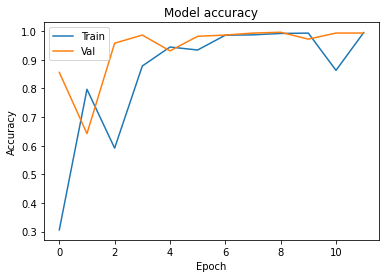

In [14]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

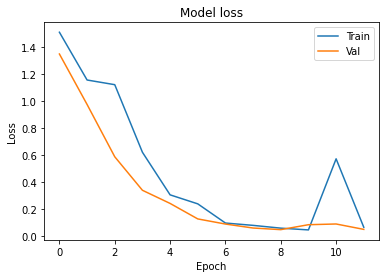

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Picking Pictures to Test the Model

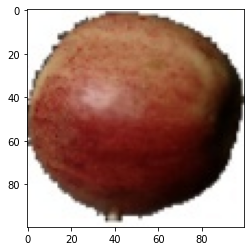

[[0.6141186  0.00239242 0.00098331 0.20417264 0.178333  ]]
Most likely class: Apple


In [16]:
single_test = X_test[10]
plt.imshow(cv2.cvtColor(single_test.astype('float32'), cv2.COLOR_BGR2RGB))
plt.show()
probabilities = model.predict(np.array( [single_test,] ))
print(probabilities)
print("Most likely class:", classes2[probabilities.argmax()])

In [17]:
y_pred = model.predict(X_test)

### Confusion Matrix + Classification Report

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# confusion_matrix(y_pred, y_test)
# print(y_pred)
# print(y_test)
# print('-'*20)

y_pred_decoded = np.empty(y_pred.shape)
x = 0
for row in y_pred:
    row_temp = []
    for element in row:
        if abs(element - np.amax(row))<0.001:
            element = 1
            row_temp.append(element)
        else:
            element = 0
            row_temp.append(element)
    y_pred_decoded[x] = np.asarray(row_temp)
    x+=1
                


def decode(data):
    indices = []
    for element in data:
        indices.append(list(element).index(1))
    return indices

print(confusion_matrix(decode(y_pred_decoded), decode(y_test)))
print()
print(classification_report(decode(y_pred_decoded), decode(y_test)))

[[144   0   0   0   0]
 [  0 166   0   0   0]
 [  0   0 166   0   0]
 [  0   0   0 156   0]
 [  0   0   0   0 160]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       166
           2       1.00      1.00      1.00       166
           3       1.00      1.00      1.00       156
           4       1.00      1.00      1.00       160

    accuracy                           1.00       792
   macro avg       1.00      1.00      1.00       792
weighted avg       1.00      1.00      1.00       792



In [19]:
# print(y_test)
# print(y_pred_decoded)